In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('模型数据.xlsx')
data.head(2)

,crash,time of week,weather,volume,temperature,daytime,season
0,1,1,cloudy,0,0,afternoon,winter
1,1,1,cloudy,0,0,afternoon,winter


In [3]:
from pgmpy.models import BayesianNetwork
model = BayesianNetwork([('time of week', 'temperature'),('time of week','volume'),
                         ('daytime','temperature'),('daytime','volume'),
                         ('season','temperature'),('season','volume'),('season','weather'),
                         ('weather','temperature'),('weather','volume'),('weather','crash'),
                         ('temperature','crash'),
                         ('volume','crash')])

In [4]:
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator
estimator = MaximumLikelihoodEstimator(model, data)

In [5]:
cpd = estimator.estimate_cpd('temperature')
print(cpd.variables)
print(cpd.cardinality)
pd.DataFrame(cpd.get_values())

['temperature', 'daytime', 'season', 'time of week', 'weather']
[3 6 4 3 5]


,0,1,2,3,4,5,6,7,8,9,...,350,351,352,353,354,355,356,357,358,359
0,0.062500,0.000000,0.206009,0.333333,0.000,0.080402,0.000000,0.0,0.333333,0.333333,...,0.9375,1.0,1.0,0.333333,1.0,1.0,1.0,0.333333,0.333333,1.0
1,0.695312,0.787692,0.656652,0.333333,0.675,0.638191,0.857143,1.0,0.333333,0.333333,...,0.0625,0.0,0.0,0.333333,0.0,0.0,0.0,0.333333,0.333333,0.0
2,0.242188,0.212308,0.137339,0.333333,0.325,0.281407,0.142857,0.0,0.333333,0.333333,...,0.0000,0.0,0.0,0.333333,0.0,0.0,0.0,0.333333,0.333333,0.0


In [6]:
cpd_matric = pd.DataFrame(cpd.get_values())
column_num = cpd_matric.shape[1]
CPD = pd.DataFrame()

# 低温

In [7]:
list0 = np.array([])
list1 = np.array([])
list2 = np.array([])
list3 = np.array([])
list4 = np.array([])
list5 = np.array([])

large_unit = 0
unit = int(column_num/cpd.cardinality[1])
for i in range(cpd.cardinality[1]):
    list0 = np.append(list0,np.linspace(int(i*large_unit + 0*unit),int(i*large_unit+ 1*unit)-1,int(unit))).astype(int)
    list1 = np.append(list1,np.linspace(int(i*large_unit + 1*unit),int(i*large_unit+ 2*unit)-1,int(unit))).astype(int)
    list2 = np.append(list2,np.linspace(int(i*large_unit + 2*unit),int(i*large_unit+ 3*unit)-1,int(unit))).astype(int)
    list3 = np.append(list3,np.linspace(int(i*large_unit + 3*unit),int(i*large_unit+ 4*unit)-1,int(unit))).astype(int)
    list4 = np.append(list4,np.linspace(int(i*large_unit + 4*unit),int(i*large_unit+ 5*unit)-1,int(unit))).astype(int)
    list5 = np.append(list5,np.linspace(int(i*large_unit + 5*unit),int(i*large_unit+ 6*unit)-1,int(unit))).astype(int)

t0 = np.array([])
for i in list0:
    t0 = np.append(t0,cpd_matric[i][0])

t1 = np.array([])
for i in list1:
    t1 = np.append(t1,cpd_matric[i][0])

t2 = np.array([])
for i in list2:
    t2 = np.append(t2,cpd_matric[i][0])

t3 = np.array([])
for i in list3:
    t3 = np.append(t3,cpd_matric[i][0])

t4 = np.array([])
for i in list4:
    t4 = np.append(t4,cpd_matric[i][0])

t5 = np.array([])
for i in list5:
    t5 = np.append(t5,cpd_matric[i][0])

CPD['temperature_0_daytime_0'] = pd.DataFrame(t0)
CPD['temperature_0_daytime_1'] = pd.DataFrame(t1)
CPD['temperature_0_daytime_2'] = pd.DataFrame(t2)
CPD['temperature_0_daytime_3'] = pd.DataFrame(t3)
CPD['temperature_0_daytime_4'] = pd.DataFrame(t4)
CPD['temperature_0_daytime_5'] = pd.DataFrame(t5)

In [8]:
list0 = np.array([])
list1 = np.array([])
list2 = np.array([])
list3 = np.array([])
t0 = np.array([])
t1 = np.array([])
t2 = np.array([])
t3 = np.array([])

large_unit = int(column_num/(cpd.cardinality[1]))
unit = int(column_num/(cpd.cardinality[1]*cpd.cardinality[2]))
for i in range(cpd.cardinality[1]):
    list0 = np.append(list0,np.linspace(int(i*large_unit + 0*unit),int(i*large_unit+ 1*unit)-1,int(unit))).astype(int)
    list1 = np.append(list1,np.linspace(int(i*large_unit + 1*unit),int(i*large_unit+ 2*unit)-1,int(unit))).astype(int)
    list2 = np.append(list2,np.linspace(int(i*large_unit + 2*unit),int(i*large_unit+ 3*unit)-1,int(unit))).astype(int)
    list3 = np.append(list3,np.linspace(int(i*large_unit + 3*unit),int(i*large_unit+ 4*unit)-1,int(unit))).astype(int)

for i in list0:
    t0 = np.append(t0,cpd_matric[i][0])

for i in list1:
    t1 = np.append(t1,cpd_matric[i][0])

for i in list2:
    t2 = np.append(t2,cpd_matric[i][0])

for i in list3:
    t3 = np.append(t3,cpd_matric[i][0])

CPD['temperature_0_season_0'] = pd.DataFrame(t0)
CPD['temperature_0_season_1'] = pd.DataFrame(t1)
CPD['temperature_0_season_2'] = pd.DataFrame(t2)
CPD['temperature_0_season_3'] = pd.DataFrame(t3)

In [9]:
list0 = np.array([])
list1 = np.array([])
list2 = np.array([])
t0 = np.array([])
t1 = np.array([])
t2 = np.array([])

large_unit = int(column_num/(cpd.cardinality[1]*cpd.cardinality[2]))
unit = int(column_num/(cpd.cardinality[1]*cpd.cardinality[2]*cpd.cardinality[3]))
for i in range(cpd.cardinality[1]):
    list0 = np.append(list0,np.linspace(int(i*large_unit + 0*unit),int(i*large_unit+ 1*unit)-1,int(unit))).astype(int)
    list1 = np.append(list1,np.linspace(int(i*large_unit + 1*unit),int(i*large_unit+ 2*unit)-1,int(unit))).astype(int)
    list2 = np.append(list2,np.linspace(int(i*large_unit + 2*unit),int(i*large_unit+ 3*unit)-1,int(unit))).astype(int)

for i in list0:
    t0 = np.append(t0,cpd_matric[i][0])

for i in list1:
    t1 = np.append(t1,cpd_matric[i][0])

for i in list2:
    t2 = np.append(t2,cpd_matric[i][0])

CPD['temperature_0_timeofweek_0'] = pd.DataFrame(t0)
CPD['temperature_0_timeofweek_1'] = pd.DataFrame(t1)
CPD['temperature_0_timeofweek_2'] = pd.DataFrame(t2)

In [10]:
list0 = np.array([])
list1 = np.array([])
list2 = np.array([])
list3 = np.array([])
list4 = np.array([])
t0 = np.array([])
t1 = np.array([])
t2 = np.array([])
t3 = np.array([])
t4 = np.array([])

large_unit = int(column_num/(cpd.cardinality[1]*cpd.cardinality[2]*cpd.cardinality[3]))
unit = int(column_num/(cpd.cardinality[1]*cpd.cardinality[2]*cpd.cardinality[3]*cpd.cardinality[4]))
for i in range(cpd.cardinality[1]):
    list0 = np.append(list0,np.linspace(int(i*large_unit + 0*unit),int(i*large_unit+ 1*unit)-1,int(unit))).astype(int)
    list1 = np.append(list1,np.linspace(int(i*large_unit + 1*unit),int(i*large_unit+ 2*unit)-1,int(unit))).astype(int)
    list2 = np.append(list2,np.linspace(int(i*large_unit + 2*unit),int(i*large_unit+ 3*unit)-1,int(unit))).astype(int)
    list3 = np.append(list3,np.linspace(int(i*large_unit + 3*unit),int(i*large_unit+ 4*unit)-1,int(unit))).astype(int)
    list4 = np.append(list3,np.linspace(int(i*large_unit + 4*unit),int(i*large_unit+ 5*unit)-1,int(unit))).astype(int)

for i in list0:
    t0 = np.append(t0,cpd_matric[i][0])

for i in list1:
    t1 = np.append(t1,cpd_matric[i][0])

for i in list2:
    t2 = np.append(t2,cpd_matric[i][0])

for i in list3:
    t3 = np.append(t3,cpd_matric[i][0])

for i in list4:
    t4 = np.append(t4,cpd_matric[i][0])

CPD['temperature_0_weather_0'] = pd.DataFrame(t0)
CPD['temperature_0_weather_1'] = pd.DataFrame(t1)
CPD['temperature_0_weather_2'] = pd.DataFrame(t2)
CPD['temperature_0_weather_3'] = pd.DataFrame(t3)
CPD['temperature_0_weather_4'] = pd.DataFrame(t4)

# 高温

In [11]:
list0 = np.array([])
list1 = np.array([])
list2 = np.array([])
list3 = np.array([])
list4 = np.array([])
list5 = np.array([])
large_unit = 0
unit = int(column_num/cpd.cardinality[1])
for i in range(cpd.cardinality[1]):
    list0 = np.append(list0,np.linspace(int(i*large_unit + 0*unit),int(i*large_unit+ 1*unit)-1,int(unit))).astype(int)
    list1 = np.append(list1,np.linspace(int(i*large_unit + 1*unit),int(i*large_unit+ 2*unit)-1,int(unit))).astype(int)
    list2 = np.append(list2,np.linspace(int(i*large_unit + 2*unit),int(i*large_unit+ 3*unit)-1,int(unit))).astype(int)
    list3 = np.append(list3,np.linspace(int(i*large_unit + 3*unit),int(i*large_unit+ 4*unit)-1,int(unit))).astype(int)
    list4 = np.append(list4,np.linspace(int(i*large_unit + 4*unit),int(i*large_unit+ 5*unit)-1,int(unit))).astype(int)
    list5 = np.append(list5,np.linspace(int(i*large_unit + 5*unit),int(i*large_unit+ 6*unit)-1,int(unit))).astype(int)

t0 = np.array([])
for i in list0:
    t0 = np.append(t0,cpd_matric[i][2])

t1 = np.array([])
for i in list1:
    t1 = np.append(t1,cpd_matric[i][2])

t2 = np.array([])
for i in list2:
    t2 = np.append(t2,cpd_matric[i][2])

t3 = np.array([])
for i in list3:
    t3 = np.append(t3,cpd_matric[i][2])

t4 = np.array([])
for i in list4:
    t4 = np.append(t4,cpd_matric[i][2])

t5 = np.array([])
for i in list5:
    t5 = np.append(t5,cpd_matric[i][2])

CPD['temperature_2_daytime_0'] = pd.DataFrame(t0)
CPD['temperature_2_daytime_1'] = pd.DataFrame(t1)
CPD['temperature_2_daytime_2'] = pd.DataFrame(t2)
CPD['temperature_2_daytime_3'] = pd.DataFrame(t3)
CPD['temperature_2_daytime_4'] = pd.DataFrame(t4)
CPD['temperature_2_daytime_5'] = pd.DataFrame(t5)

In [12]:
list0 = np.array([])
list1 = np.array([])
list2 = np.array([])
list3 = np.array([])
t0 = np.array([])
t1 = np.array([])
t2 = np.array([])
t3 = np.array([])

large_unit = int(column_num/(cpd.cardinality[1]))
unit = int(column_num/(cpd.cardinality[1]*cpd.cardinality[2]))
for i in range(cpd.cardinality[1]):
    list0 = np.append(list0,np.linspace(int(i*large_unit + 0*unit),int(i*large_unit+ 1*unit)-1,int(unit))).astype(int)
    list1 = np.append(list1,np.linspace(int(i*large_unit + 1*unit),int(i*large_unit+ 2*unit)-1,int(unit))).astype(int)
    list2 = np.append(list2,np.linspace(int(i*large_unit + 2*unit),int(i*large_unit+ 3*unit)-1,int(unit))).astype(int)
    list3 = np.append(list3,np.linspace(int(i*large_unit + 3*unit),int(i*large_unit+ 4*unit)-1,int(unit))).astype(int)

for i in list0:
    t0 = np.append(t0,cpd_matric[i][2])

for i in list1:
    t1 = np.append(t1,cpd_matric[i][2])

for i in list2:
    t2 = np.append(t2,cpd_matric[i][2])

for i in list3:
    t3 = np.append(t3,cpd_matric[i][2])

CPD['temperature_2_season_0'] = pd.DataFrame(t0)
CPD['temperature_2_season_1'] = pd.DataFrame(t1)
CPD['temperature_2_season_2'] = pd.DataFrame(t2)
CPD['temperature_2_season_3'] = pd.DataFrame(t3)

In [13]:
list0 = np.array([])
list1 = np.array([])
list2 = np.array([])
t0 = np.array([])
t1 = np.array([])
t2 = np.array([])

large_unit = int(column_num/(cpd.cardinality[1]*cpd.cardinality[2]))
unit = int(column_num/(cpd.cardinality[1]*cpd.cardinality[2]*cpd.cardinality[3]))
for i in range(cpd.cardinality[1]):
    list0 = np.append(list0,np.linspace(int(i*large_unit + 0*unit),int(i*large_unit+ 1*unit)-1,int(unit))).astype(int)
    list1 = np.append(list1,np.linspace(int(i*large_unit + 1*unit),int(i*large_unit+ 2*unit)-1,int(unit))).astype(int)
    list2 = np.append(list2,np.linspace(int(i*large_unit + 2*unit),int(i*large_unit+ 3*unit)-1,int(unit))).astype(int)

for i in list0:
    t0 = np.append(t0,cpd_matric[i][2])

for i in list1:
    t1 = np.append(t1,cpd_matric[i][2])

for i in list2:
    t2 = np.append(t2,cpd_matric[i][2])

CPD['temperature_2_timeofweek_0'] = pd.DataFrame(t0)
CPD['temperature_2_timeofweek_1'] = pd.DataFrame(t1)
CPD['temperature_2_timeofweek_2'] = pd.DataFrame(t2)

In [14]:
list0 = np.array([])
list1 = np.array([])
list2 = np.array([])
list3 = np.array([])
list4 = np.array([])
t0 = np.array([])
t1 = np.array([])
t2 = np.array([])
t3 = np.array([])
t4 = np.array([])

large_unit = int(column_num/(cpd.cardinality[1]*cpd.cardinality[2]*cpd.cardinality[3]))
unit = int(column_num/(cpd.cardinality[1]*cpd.cardinality[2]*cpd.cardinality[3]*cpd.cardinality[4]))
for i in range(cpd.cardinality[1]):
    list0 = np.append(list0,np.linspace(int(i*large_unit + 0*unit),int(i*large_unit+ 1*unit)-1,int(unit))).astype(int)
    list1 = np.append(list1,np.linspace(int(i*large_unit + 1*unit),int(i*large_unit+ 2*unit)-1,int(unit))).astype(int)
    list2 = np.append(list2,np.linspace(int(i*large_unit + 2*unit),int(i*large_unit+ 3*unit)-1,int(unit))).astype(int)
    list3 = np.append(list3,np.linspace(int(i*large_unit + 3*unit),int(i*large_unit+ 4*unit)-1,int(unit))).astype(int)
    list4 = np.append(list3,np.linspace(int(i*large_unit + 4*unit),int(i*large_unit+ 5*unit)-1,int(unit))).astype(int)

for i in list0:
    t0 = np.append(t0,cpd_matric[i][2])

for i in list1:
    t1 = np.append(t1,cpd_matric[i][2])

for i in list2:
    t2 = np.append(t2,cpd_matric[i][2])

for i in list3:
    t3 = np.append(t3,cpd_matric[i][2])

for i in list4:
    t4 = np.append(t4,cpd_matric[i][2])

CPD['temperature_2_weather_0'] = pd.DataFrame(t0)
CPD['temperature_2_weather_1'] = pd.DataFrame(t1)
CPD['temperature_2_weather_2'] = pd.DataFrame(t2)
CPD['temperature_2_weather_3'] = pd.DataFrame(t3)
CPD['temperature_2_weather_4'] = pd.DataFrame(t4)

In [15]:
CPD.columns

Index(['temperature_0_daytime_0', 'temperature_0_daytime_1',
       'temperature_0_daytime_2', 'temperature_0_daytime_3',
       'temperature_0_daytime_4', 'temperature_0_daytime_5',
       'temperature_0_season_0', 'temperature_0_season_1',
       'temperature_0_season_2', 'temperature_0_season_3',
       'temperature_0_timeofweek_0', 'temperature_0_timeofweek_1',
       'temperature_0_timeofweek_2', 'temperature_0_weather_0',
       'temperature_0_weather_1', 'temperature_0_weather_2',
       'temperature_0_weather_3', 'temperature_0_weather_4',
       'temperature_2_daytime_0', 'temperature_2_daytime_1',
       'temperature_2_daytime_2', 'temperature_2_daytime_3',
       'temperature_2_daytime_4', 'temperature_2_daytime_5',
       'temperature_2_season_0', 'temperature_2_season_1',
       'temperature_2_season_2', 'temperature_2_season_3',
       'temperature_2_timeofweek_0', 'temperature_2_timeofweek_1',
       'temperature_2_timeofweek_2', 'temperature_2_weather_0',
       'temper

# 出图

In [16]:
cpd = CPD.copy()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [18]:
#
data = pd.DataFrame()

tem = pd.DataFrame()
tem['CPD0'] = cpd[['temperature_0_daytime_0']]
tem['Daytime'] = 'Afternoon'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD0'] = cpd[['temperature_0_daytime_1']]
tem['Daytime'] = 'Dawn'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD0'] = cpd[['temperature_0_daytime_2']]
tem['Daytime'] = 'Evening'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD0'] = cpd[['temperature_0_daytime_3']]
tem['Daytime'] = 'Morning'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD0'] = cpd[['temperature_0_daytime_4']]
tem['Daytime'] = 'Noon'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD1'] = cpd[['temperature_0_season_0']]
tem['Season'] = 'Autumn'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD1'] = cpd[['temperature_0_season_1']]
tem['Season'] = 'Spring'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD1'] = cpd[['temperature_0_season_2']]
tem['Season'] = 'Summer'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD1'] = cpd[['temperature_0_season_3']]
tem['Season'] = 'Winter'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD2'] = cpd[['temperature_0_timeofweek_0']]
tem['Timeofweek'] = 'Weekday'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD2'] = cpd[['temperature_0_timeofweek_1']]
tem['Timeofweek'] = 'Weekend'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD2'] = cpd[['temperature_0_timeofweek_2']]
tem['Timeofweek'] = 'Holiday'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD3'] = cpd[['temperature_0_weather_0']]
tem['Weather'] = 'Cloudy'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD3'] = cpd[['temperature_0_weather_1']]
tem['Weather'] = 'Foggy'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD3'] = cpd[['temperature_0_weather_2']]
tem['Weather'] = 'Rainy'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD3'] = cpd[['temperature_0_weather_3']]
tem['Weather'] = 'Snowy'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD3'] = cpd[['temperature_0_weather_4']]
tem['Weather'] = 'Sunny'
data = pd.concat([data,tem],axis=0)

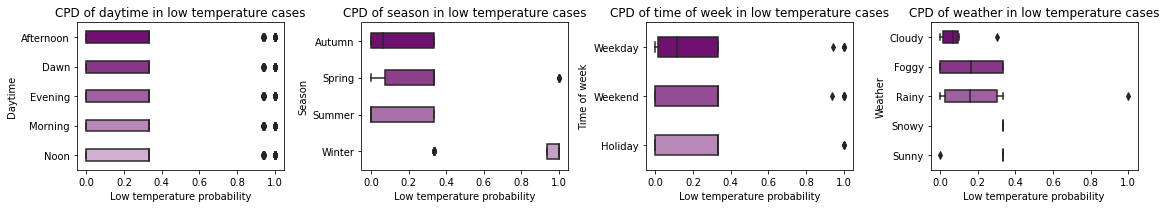

In [19]:
width = 0.4

plt.figure(figsize=(16,3))
purple_cmap = colors.LinearSegmentedColormap.from_list("Purple", ["purple", "white"])

plt.subplot(1, 4, 1)
labels = data['Daytime'].unique()
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(purple_cmap(norm(i))) for i in range(len(labels))]
custom_palette = sns.color_palette(color_list)
sns.boxplot(x='CPD0', y='Daytime', data=data, width=width, palette=custom_palette)
#plt.ylabel('Temperature',fontsize=i,fontproperties='Times New Roman')
plt.ylabel('Daytime')
plt.xlabel('Low temperature probability')
plt.title('CPD of daytime in low temperature cases')
plt.tight_layout()

plt.subplot(1, 4, 2)
labels = data['Season'].unique()
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(purple_cmap(norm(i))) for i in range(len(labels))]
custom_palette = sns.color_palette(color_list)
sns.boxplot(x='CPD1', y='Season', data=data, width=width, palette=custom_palette)
plt.ylabel('Season')
plt.xlabel('Low temperature probability')
plt.title('CPD of season in low temperature cases')
plt.tight_layout()

plt.subplot(1, 4, 3)
labels = data['Timeofweek'].unique()
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(purple_cmap(norm(i))) for i in range(len(labels))]
custom_palette = sns.color_palette(color_list)
sns.boxplot(x='CPD2', y='Timeofweek', data=data, width=width, palette=custom_palette)
plt.ylabel('Time of week')
plt.xlabel('Low temperature probability')
plt.title('CPD of time of week in low temperature cases')
plt.tight_layout()

plt.subplot(1, 4, 4)
labels = data['Weather'].unique()
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(purple_cmap(norm(i))) for i in range(len(labels))]
custom_palette = sns.color_palette(color_list)
sns.boxplot(x='CPD3', y='Weather', data=data, width=width, palette=custom_palette)
plt.ylabel('Weather')
plt.xlabel('Low temperature probability')
plt.title('CPD of weather in low temperature cases')
plt.tight_layout()
#plt.text(1.95,0.4,'Crash',fontsize=10,weight='bold')
plt.savefig('Fig/Low temperature.jpg',dpi=500)
plt.show()

In [20]:
#
data = pd.DataFrame()

tem = pd.DataFrame()
tem['CPD0'] = cpd[['temperature_2_daytime_0']]
tem['Daytime'] = 'Afternoon'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD0'] = cpd[['temperature_2_daytime_1']]
tem['Daytime'] = 'Dawn'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD0'] = cpd[['temperature_2_daytime_2']]
tem['Daytime'] = 'Evening'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD0'] = cpd[['temperature_2_daytime_3']]
tem['Daytime'] = 'Morning'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD0'] = cpd[['temperature_2_daytime_4']]
tem['Daytime'] = 'Noon'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD1'] = cpd[['temperature_2_season_0']]
tem['Season'] = 'Autumn'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD1'] = cpd[['temperature_2_season_1']]
tem['Season'] = 'Spring'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD1'] = cpd[['temperature_2_season_2']]
tem['Season'] = 'Summer'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD1'] = cpd[['temperature_2_season_3']]
tem['Season'] = 'Winter'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD2'] = cpd[['temperature_2_timeofweek_0']]
tem['Timeofweek'] = 'Weekday'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD2'] = cpd[['temperature_2_timeofweek_1']]
tem['Timeofweek'] = 'Weekend'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD2'] = cpd[['temperature_2_timeofweek_2']]
tem['Timeofweek'] = 'Holiday'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD3'] = cpd[['temperature_2_weather_0']]
tem['Weather'] = 'Cloudy'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD3'] = cpd[['temperature_2_weather_1']]
tem['Weather'] = 'Foggy'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD3'] = cpd[['temperature_2_weather_2']]
tem['Weather'] = 'Rainy'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD3'] = cpd[['temperature_2_weather_3']]
tem['Weather'] = 'Snowy'
data = pd.concat([data,tem],axis=0)

tem = pd.DataFrame()
tem['CPD3'] = cpd[['temperature_2_weather_4']]
tem['Weather'] = 'Sunny'
data = pd.concat([data,tem],axis=0)

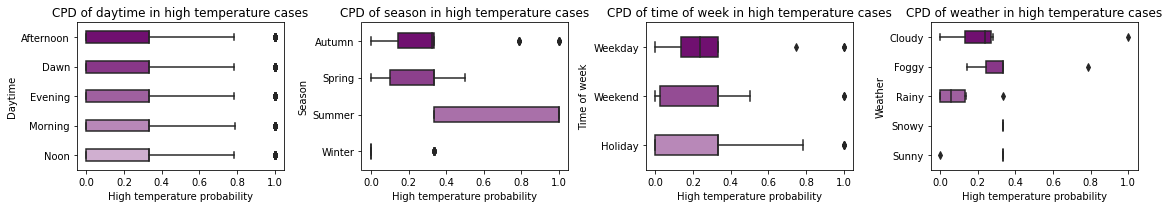

In [21]:
width = 0.4

plt.figure(figsize=(16,3))
purple_cmap = colors.LinearSegmentedColormap.from_list("Purple", ["purple", "white"])

plt.subplot(1, 4, 1)
labels = data['Daytime'].unique()
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(purple_cmap(norm(i))) for i in range(len(labels))]
custom_palette = sns.color_palette(color_list)
sns.boxplot(x='CPD0', y='Daytime', data=data, width=width, palette=custom_palette)
#plt.ylabel('Temperature',fontsize=i,fontproperties='Times New Roman')
plt.ylabel('Daytime')
plt.xlabel('High temperature probability')
plt.title('CPD of daytime in high temperature cases')
plt.tight_layout()

plt.subplot(1, 4, 2)
labels = data['Season'].unique()
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(purple_cmap(norm(i))) for i in range(len(labels))]
custom_palette = sns.color_palette(color_list)
sns.boxplot(x='CPD1', y='Season', data=data, width=width, palette=custom_palette)
plt.ylabel('Season')
plt.xlabel('High temperature probability')
plt.title('CPD of season in high temperature cases')
plt.tight_layout()

plt.subplot(1, 4, 3)
labels = data['Timeofweek'].unique()
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(purple_cmap(norm(i))) for i in range(len(labels))]
custom_palette = sns.color_palette(color_list)
sns.boxplot(x='CPD2', y='Timeofweek', data=data, width=width, palette=custom_palette)
plt.ylabel('Time of week')
plt.xlabel('High temperature probability')
plt.title('CPD of time of week in high temperature cases')
plt.tight_layout()

plt.subplot(1, 4, 4)
labels = data['Weather'].unique()
norm = colors.Normalize(vmin=0, vmax=len(labels))
color_list = [colors.rgb2hex(purple_cmap(norm(i))) for i in range(len(labels))]
custom_palette = sns.color_palette(color_list)
sns.boxplot(x='CPD3', y='Weather', data=data, width=width, palette=custom_palette)
plt.ylabel('Weather')
plt.xlabel('High temperature probability')
plt.title('CPD of weather in high temperature cases')
plt.tight_layout()
#plt.text(1.95,0.4,'Crash',fontsize=10,weight='bold')
plt.savefig('Fig/High temperature.jpg',dpi=500)
plt.show()